In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

import warnings
warnings.filterwarnings('ignore')

import folium

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [443]:
!wget https://raw.githubusercontent.com/Singhsansar/Machine-Learning-Project/main/Dataset/finalTrain.csv

--2024-03-09 11:42:43--  https://raw.githubusercontent.com/Singhsansar/Machine-Learning-Project/main/Dataset/finalTrain.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371825 (6.1M) [text/plain]
Saving to: ‘finalTrain.csv’

finalTrain.csv      100%[===================>]   6.08M  21.5MB/s    in 0.3s    

2024-03-09 11:42:44 (21.5 MB/s) - ‘finalTrain.csv’ saved [6371825/6371825]



In [444]:
data = pd.read_csv('finalTrain.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [445]:
data.shape

(45584, 20)

In [446]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [448]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [449]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [450]:
#check the unique values in each column and if the unique values are less then 8 then also print them
for i in data.columns:
  print(f' no of unique values in {i} :{data[i].nunique()}')
  if (data[i].nunique()<8):
    print(f" unique value are: {data[i].unique()} " )
  else:
    pass

 no of unique values in ID :45584
 no of unique values in Delivery_person_ID :1320
 no of unique values in Delivery_person_Age :22
 no of unique values in Delivery_person_Ratings :28
 no of unique values in Restaurant_latitude :657
 no of unique values in Restaurant_longitude :518
 no of unique values in Delivery_location_latitude :4373
 no of unique values in Delivery_location_longitude :4373
 no of unique values in Order_Date :44
 no of unique values in Time_Orderd :176
 no of unique values in Time_Order_picked :193
 no of unique values in Weather_conditions :6
 unique value are: ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan] 
 no of unique values in Road_traffic_density :4
 unique value are: ['Jam' 'High' 'Medium' 'Low' nan] 
 no of unique values in Vehicle_condition :4
 unique value are: [2 1 0 3] 
 no of unique values in Type_of_order :4
 unique value are: ['Snack' 'Meal' 'Drinks' 'Buffet'] 
 no of unique values in Type_of_vehicle :4
 unique value are: ['motorcycle' 's

In [451]:
feature = []
dtypes = []
count = []
unique =[]
missing = []
missing_percentage = []

for column in data.columns:
  feature.append(column)
  count.append(len(data[column]))
  missing.append(data[column].isnull().sum())
  unique.append(data[column].nunique())
  missing_percentage.append(data[column].isnull().sum()/data.shape[0]*100)
  dtypes.append(data[column].dtypes)

dataframe = pd.DataFrame({'feature':feature,
                          'count':count,
                          'nunique': unique,
                          'missing_percentage':missing_percentage,
                          'dtype':dtypes
                          })
dataframe.set_index('feature')


,count,nunique,missing_percentage,dtype
feature,,,,
ID,45584,45584,0.000000,object
Delivery_person_ID,45584,1320,0.000000,object
Delivery_person_Age,45584,22,4.067217,float64
Delivery_person_Ratings,45584,28,4.185679,float64
Restaurant_latitude,45584,657,0.000000,float64
Restaurant_longitude,45584,518,0.000000,float64
Delivery_location_latitude,45584,4373,0.000000,float64
Delivery_location_longitude,45584,4373,0.000000,float64
Order_Date,45584,44,0.000000,object


## **Remove the unwanted features**

In [452]:
# remoive the ID no relevence in this context
data.drop('ID',axis=1,inplace=True)

In [453]:
#changing the datatype of the Order_Date to the Datetime type
data['Order_Date'] = pd.to_datetime(data['Order_Date'])


In [454]:
data['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [455]:
data['Order_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45584 entries, 0 to 45583
Series name: Order_Date
Non-Null Count  Dtype         
--------------  -----         
45584 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 356.2 KB


In [456]:
#extract the day , month and year and then drop the Order_date column
data['year']= data['Order_Date'].dt.year
data['month']= data['Order_Date'].dt.month
data['day']= data['Order_Date'].dt.day

In [457]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,4,3
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [458]:
data.drop('Order_Date',axis=1 ,inplace= True)

In [459]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,4,3
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [460]:
data.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [461]:
data.dropna(subset=['Time_Orderd'], inplace=True)

In [462]:
data['Time_Orderd'] = data['Time_Orderd'].str.replace('.',':') #changing the time in the decimal to the time like format seperating  the minutes and hour in with the colon sign

In [463]:
data['Time_Orderd'].sample(10)

13776    0:916666667
7800           23:25
8683           21:25
18129    0:791666667
32621              1
4605           23:35
14895          12:45
40789          10:50
14811          23:40
34352          11:30
Name: Time_Orderd, dtype: object

In [464]:
# for handling error , if the same format is not followed then return 00:00
def extract_time(x):
  try:
    # print(x.split(':')[1][:2])
    return x.split(':')[0] + ':' + x.split(':')[1][:2]

  except IndexError:
    return '00:00'

data['Time_Orderd'] = data['Time_Orderd'].apply(extract_time)

In [465]:
type(data['Time_Orderd'])

pandas.core.series.Series

In [466]:
# prompt: data['Time_orderd'] = pd.to_datetime(data['Time_Orderd'])

data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format="%H:%M:%S",errors='ignore')


In [467]:
# adding the timeorder hour as type integer
data['TimeOrder_Hour'] = data['Time_Orderd'].str.split(':',expand=True)[0]
#replacing '0' with '00'  - both indicate 24th hr
data['TimeOrder_Hour'] = data['TimeOrder_Hour'].replace('0','00')
data['TimeOrder_Hour'] = data['TimeOrder_Hour'].astype('int32')

In [468]:
#order minute
data['TimeOrder_min'] = data['Time_Orderd'].str.split(':',expand=True)[1]
data['TimeOrder_min'] = data['TimeOrder_min'].astype('int32')

In [469]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,12,2,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,4,3,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [470]:
# In our TimeOrder_Hour columns
# 7AM -12PM       - breakfast
# 12PM - 15PM     - Lunch
# 15PM - 17PM     - after Lunch
# 17 -  19        - evening snaks
# 19 - 24         - Dinner

In [471]:
data['Time_Order_picked'] = data['Time_Order_picked'].str.replace('.',':')

In [472]:
def extract_time(x):
  try:
    return x.split(':')[0] + ':' + x.split(':')[1][:2]

  except IndexError:
    return '00:00'

data['Time_Order_picked'] = data['Time_Order_picked'].apply(extract_time)

In [473]:
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'] ,format='%H:%M:%S', errors = 'ignore')

In [474]:
data['Time_Order_picked_Hour'] = data['Time_Order_picked'].str.split(':',expand=True)[0]
data['Time_Order_picked_Hour'] = data['Time_Order_picked_Hour'].astype('int32')

In [475]:
data['Time_Order_picked_min'] = data['Time_Order_picked'].str.split(':',expand=True)[1]
data['Time_Order_picked_min'] = data['Time_Order_picked_min'].astype('int32')

In [476]:
# daga.drop('Time_Order_picked',axis=1)
# data.head()

# Extracting city from ther delivery_person_ID

In [477]:
data['Delivery_city'] = data['Delivery_person_ID'].str.split('RES',expand= True)[0]

In [478]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,12,2,21,55,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,4,3,17,30,17,40,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [479]:
data['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [480]:
data.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

In [481]:
data['Restaurant_latitude'].dtypes

dtype('float64')

In [482]:
# In the rating column , around 268 , of the columns are null
data['Delivery_person_Ratings'].isnull().sum()

268

# filling the null value with the mean of that person id

In [483]:
# mean of all the delivery person and it's rating
rating_map = round(data.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].fillna(data['Delivery_person_ID'].map(rating_map))

In [484]:
data['Delivery_person_Ratings'].isnull().sum()

0

Working with the Map

In [485]:
#this is the map we are using for the Delivery time predection
folium.Map(tiles='cartodb positron')

# plot the lattitude and Longitude of the Resturant

In [486]:
# @title Default title text
# plotting the lattitude and loggitude
import plotly.express as px

data1 = data.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=3,
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [487]:
# Latitude of india is 8°4` N to  37°6` N
# Longitude of India is 68°7` E to 97°25` E

# this data set is reated to India. but in some of Latitude is given in negative(-), negative latitude is related
# to indian ocean

# so that there is much chances that negative sign in lattitude is by mistake

In [488]:
# changing -ve to +ve dataset
# using the abs values to do so
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()

In [489]:
# @title Default title text
# plotting the lattitude and loggitude
import plotly.express as px

data1 = data.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=3,
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### **Finding the distance between any two points on the sphere(such as the Earth is sphare), we can use the Haversine formula**

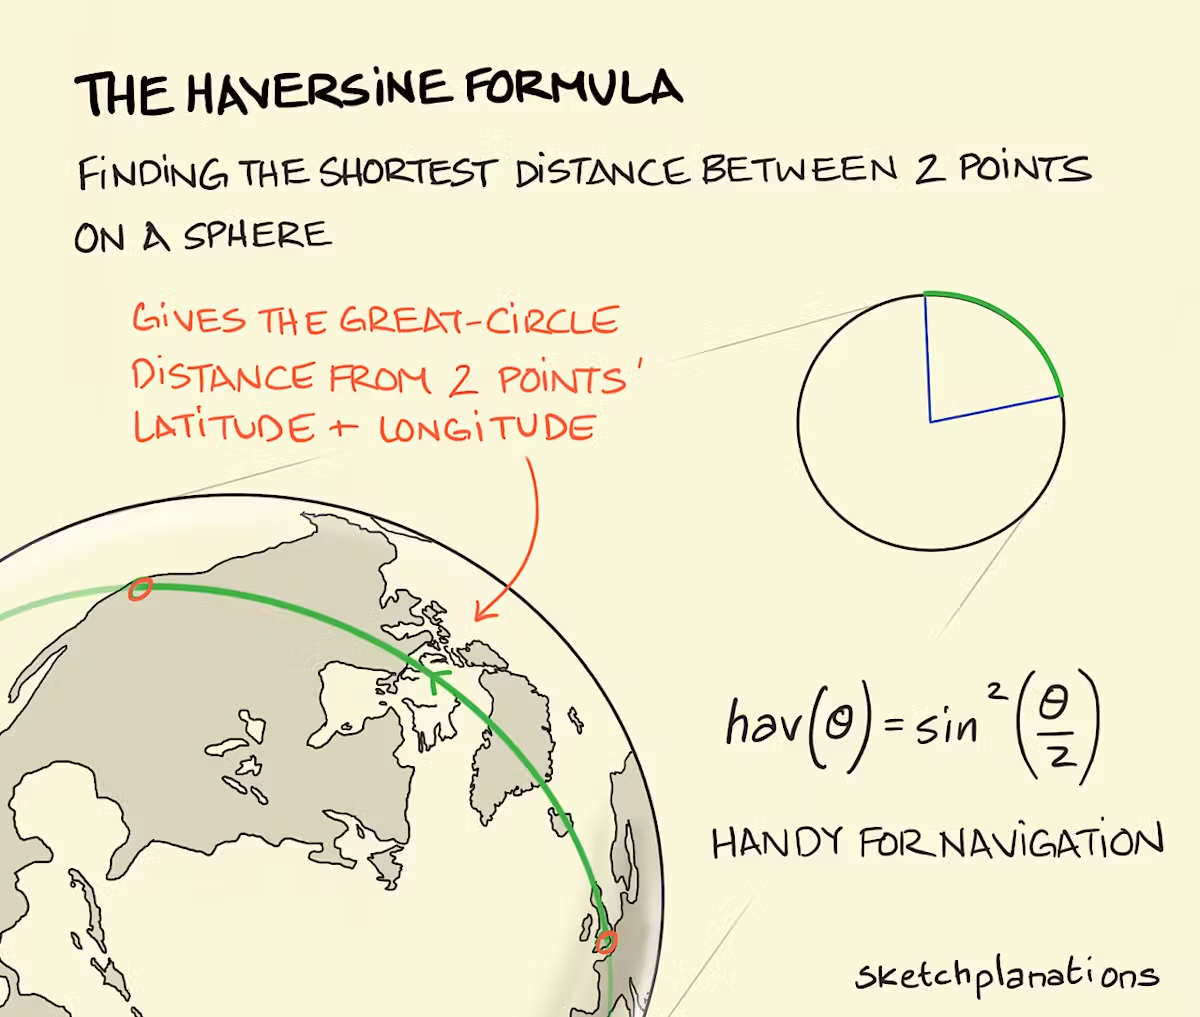

In [490]:
import math

def distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    distance = R * c
    return distance

data['distance'] = data.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [491]:
data['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [492]:
data.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [493]:
# droping those lattitude and longitude which are less than and above the lattitude and longitude of india , as we are only interested in the delivery predection in India
#calculating the latitude and longitude count
data[(data['Restaurant_latitude'] < 8) & (data['Delivery_location_latitude'] < 8 )].shape

(3509, 27)

In [494]:
# droping unwanted longitude and lattitude
data  = data.drop(data[(data['Restaurant_latitude'] < 8) & (data['Delivery_location_latitude'] < 8 )].index)

In [495]:
# none are out of range here , so no need to delere any thing here
data[(data['Restaurant_latitude'] >37 ) & (data['Delivery_location_latitude'] < 37 )]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [496]:
# checking for the longitude
data[(data['Restaurant_longitude'] < 68) & (data['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [497]:
# age has been removed as there is no much relevence of the age of the delivery person
data.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

# **Minimum Distance**

In [498]:
min_distance = data.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']].min().sort_values(by='distance',ascending= True).head(2)
min_distance # the minimun distance in the dataset is 1.4 KM around

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.839820,30.924057,75.849820
1.465123,30.905562,75.832841,30.915562,75.842841


## Plot the graph between the resturant and the customer

In [499]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

# Maximum Distance

In [500]:
max_distance = data.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']].min().sort_values(by='distance',ascending= False).head(2)
max_distance # the minimun distance in the dataset is 1.4 KM around

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187
20.969045,25.449659,81.839744,25.589659,81.979744


In [501]:
tooltips = f"Distance:{data['distance'].max()} Km"
tooltips

'Distance:20.969489380087342 Km'

In [502]:
# ploting the graph with the maximum distance
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

m = folium.Map(location=[25.443994, 81.860187], zoom_start=12) # Create a map object centered on a specific location

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m) # Add a marker for the delivery location

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994,82.000187]], color='red',tooltip=tooltips).add_to(m)


# Display the map
fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

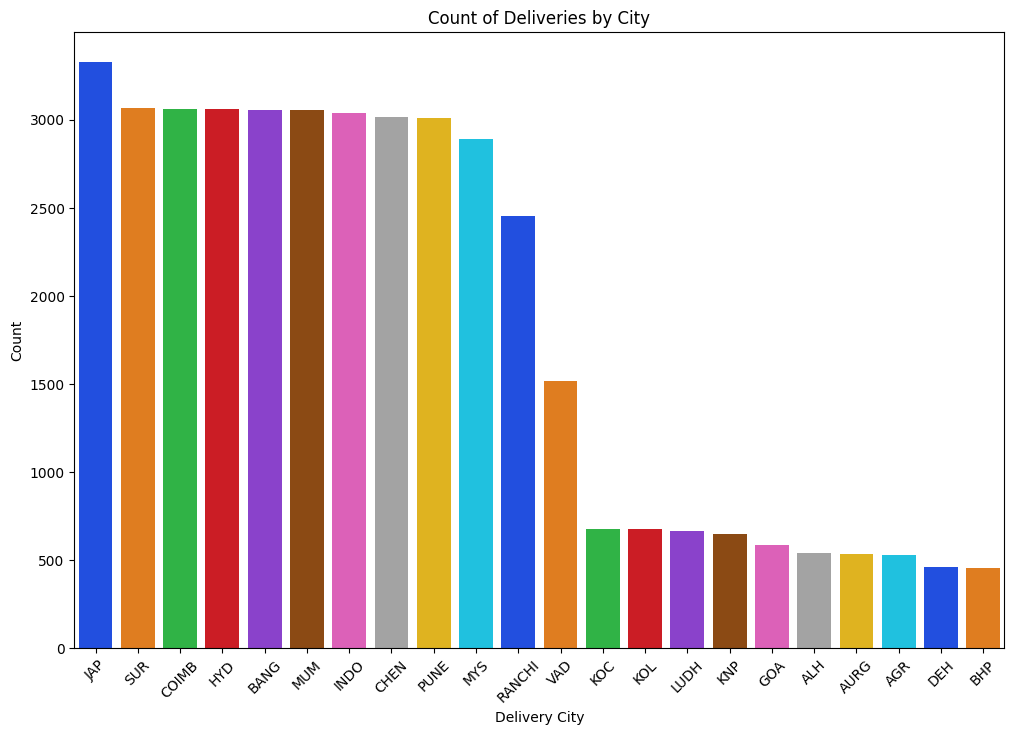

In [503]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=data['Delivery_city'].value_counts().index, y=data['Delivery_city'].value_counts(), palette='bright')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Delivery City')
plt.ylabel('Count')
plt.title('Count of Deliveries by City')
plt.show()


In [504]:
data.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

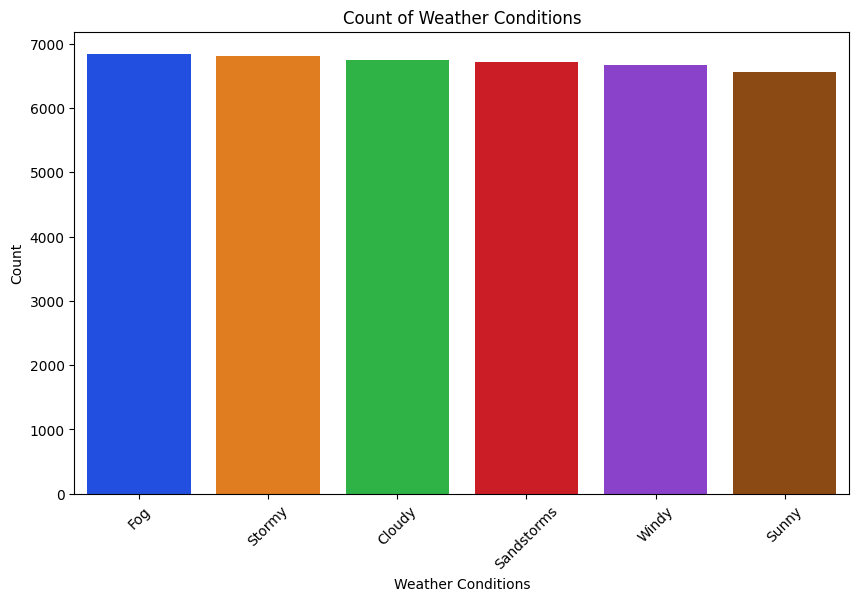

In [505]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Weather_conditions'].value_counts().index, y=data['Weather_conditions'].value_counts(), palette='bright')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.title('Count of Weather Conditions')
plt.show()


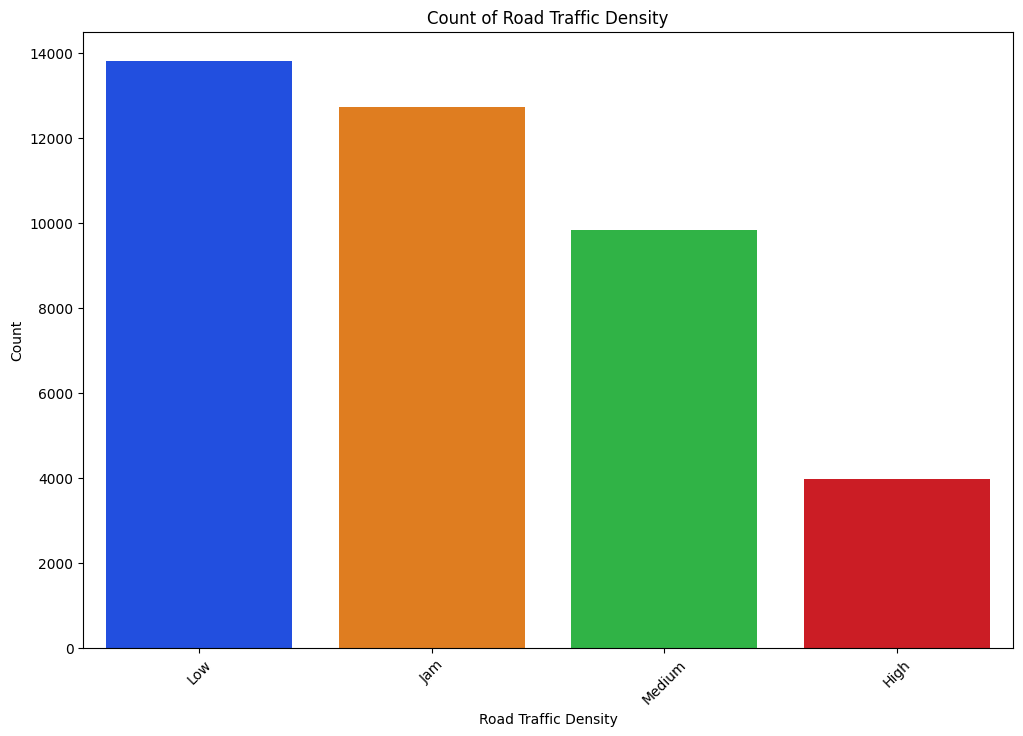

In [506]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['Road_traffic_density'].value_counts().index, y=data['Road_traffic_density'].value_counts(), palette='bright')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Road Traffic Density')
plt.ylabel('Count')
plt.title('Count of Road Traffic Density')
plt.show()


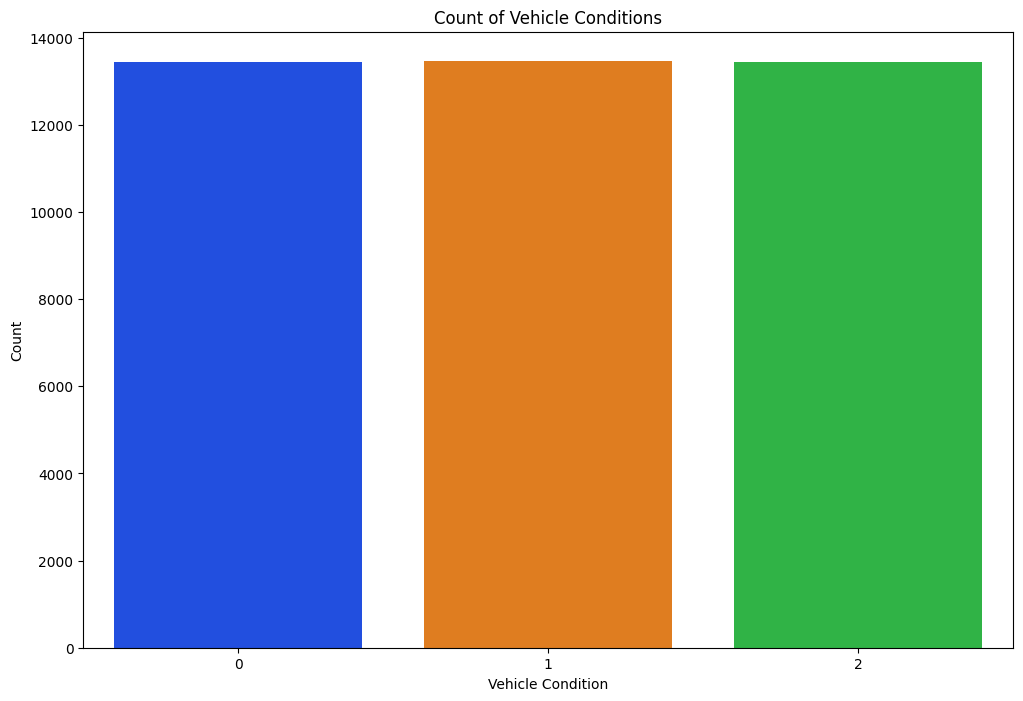

In [507]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['Vehicle_condition'].value_counts().index, y=data['Vehicle_condition'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Vehicle Condition')
plt.ylabel('Count')
plt.title('Count of Vehicle Conditions')
plt.show()


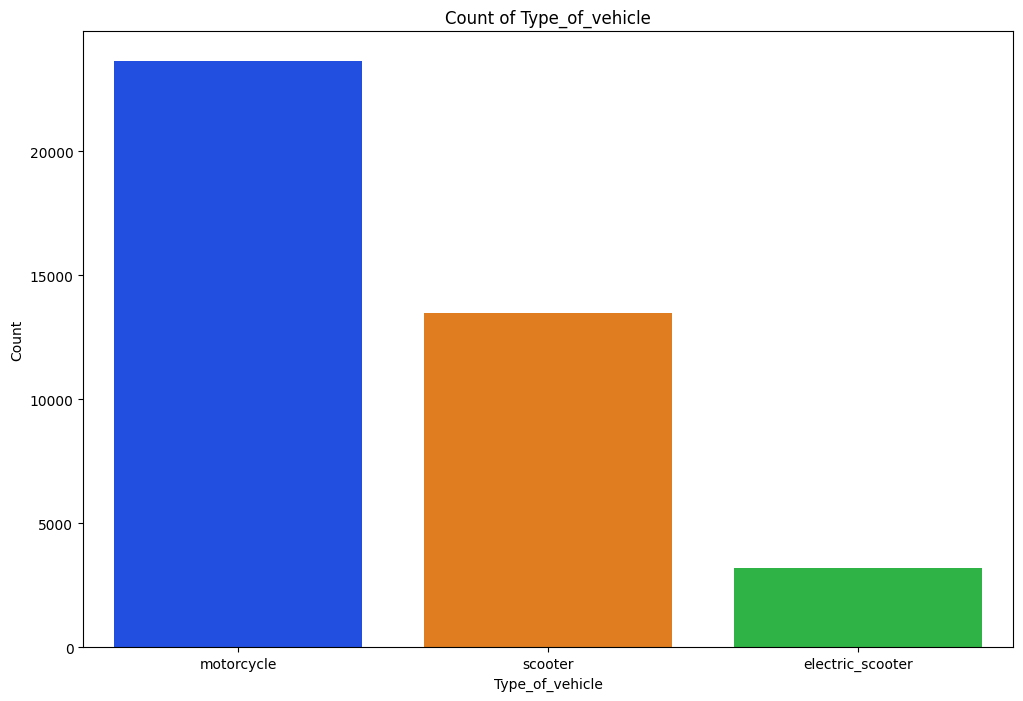

In [508]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['Type_of_vehicle'].value_counts().index, y=data['Type_of_vehicle'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Type_of_vehicle')
plt.ylabel('Count')
plt.title('Count of Type_of_vehicle')
plt.show()


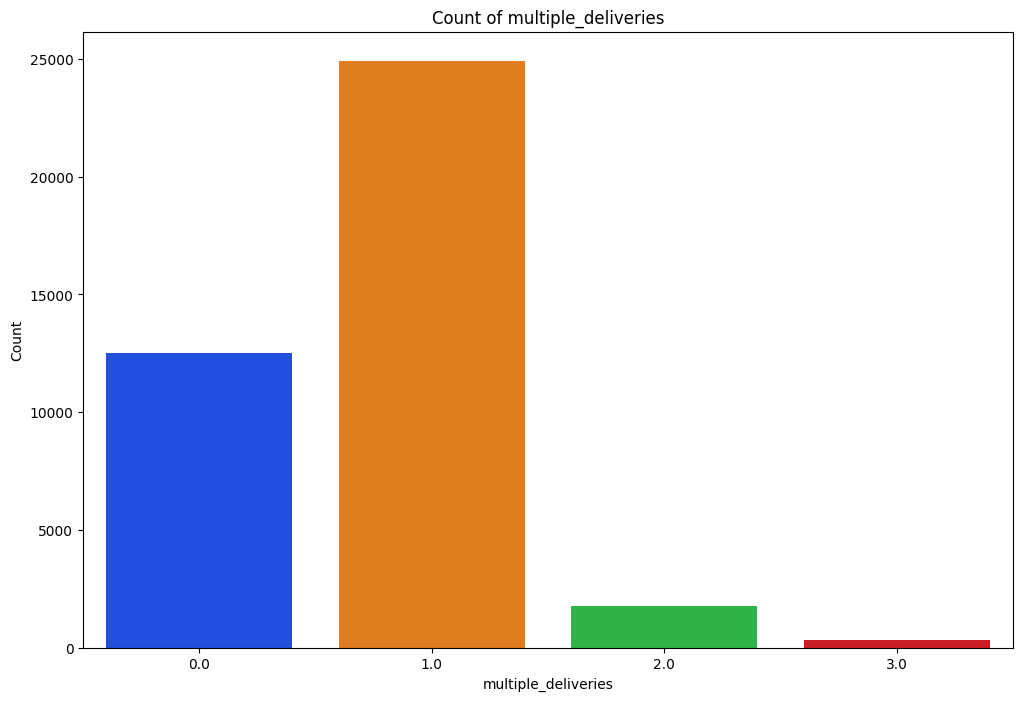

In [509]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['multiple_deliveries'].value_counts().index, y=data['multiple_deliveries'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('multiple_deliveries')
plt.ylabel('Count')
plt.title('Count of multiple_deliveries')
plt.show()

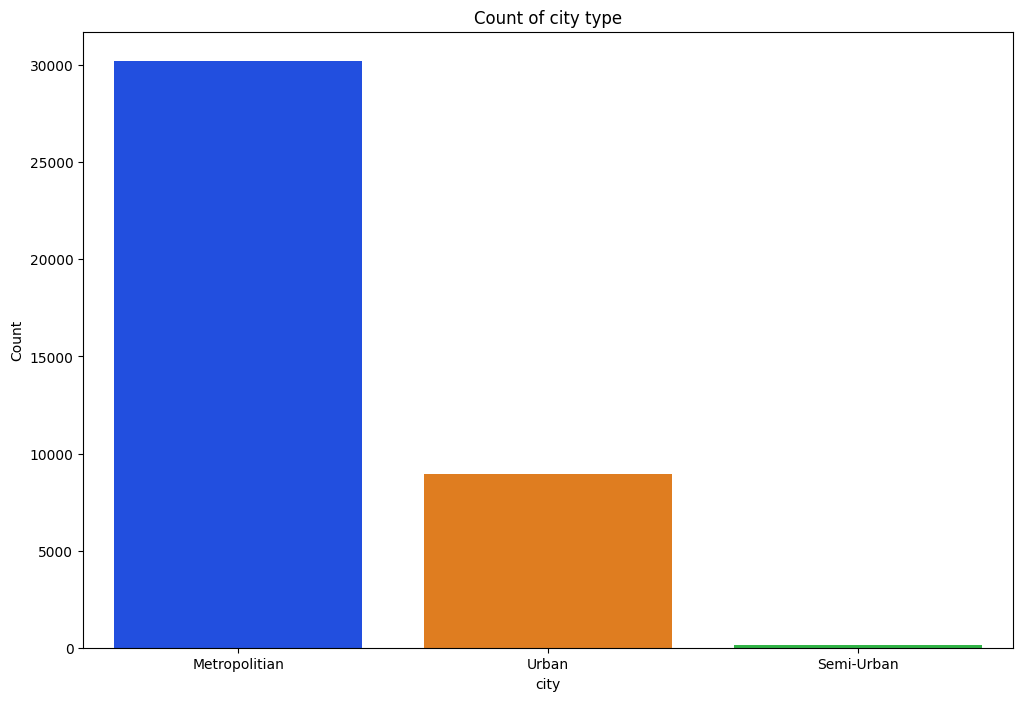

In [510]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['City'].value_counts().index, y=data['City'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('city')
plt.ylabel('Count')
plt.title('Count of city type')
plt.show()

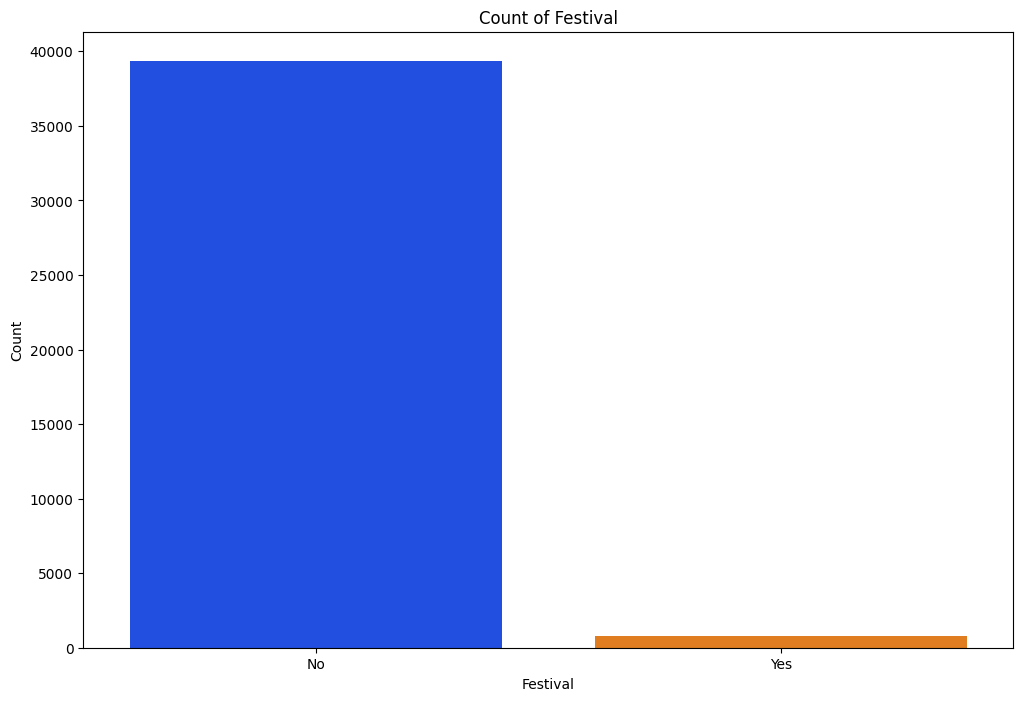

In [511]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['Festival'].value_counts().index, y=data['Festival'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Festival')
plt.ylabel('Count')
plt.title('Count of Festival')
plt.show()

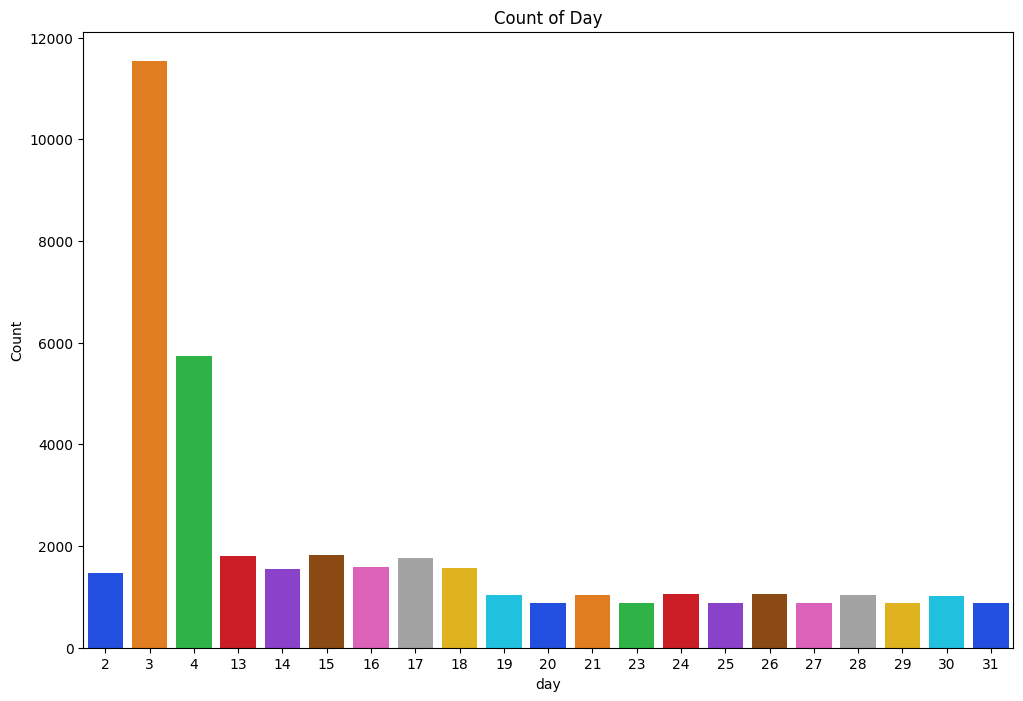

In [512]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['day'].value_counts().index, y=data['day'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('day')
plt.ylabel('Count')
plt.title('Count of Day')
plt.show()

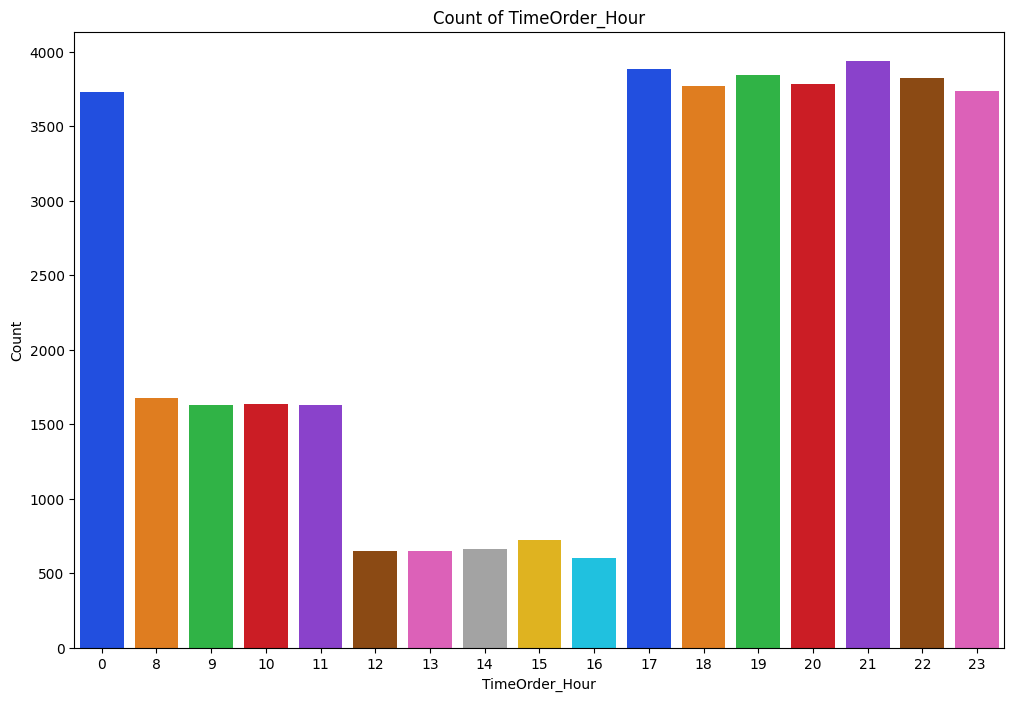

In [513]:
plt.figure(figsize=(12, 8))
sns.barplot(x=data['TimeOrder_Hour'].value_counts().index, y=data['TimeOrder_Hour'].value_counts(), palette='bright')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('TimeOrder_Hour')
plt.ylabel('Count')
plt.title('Count of TimeOrder_Hour')
plt.show()

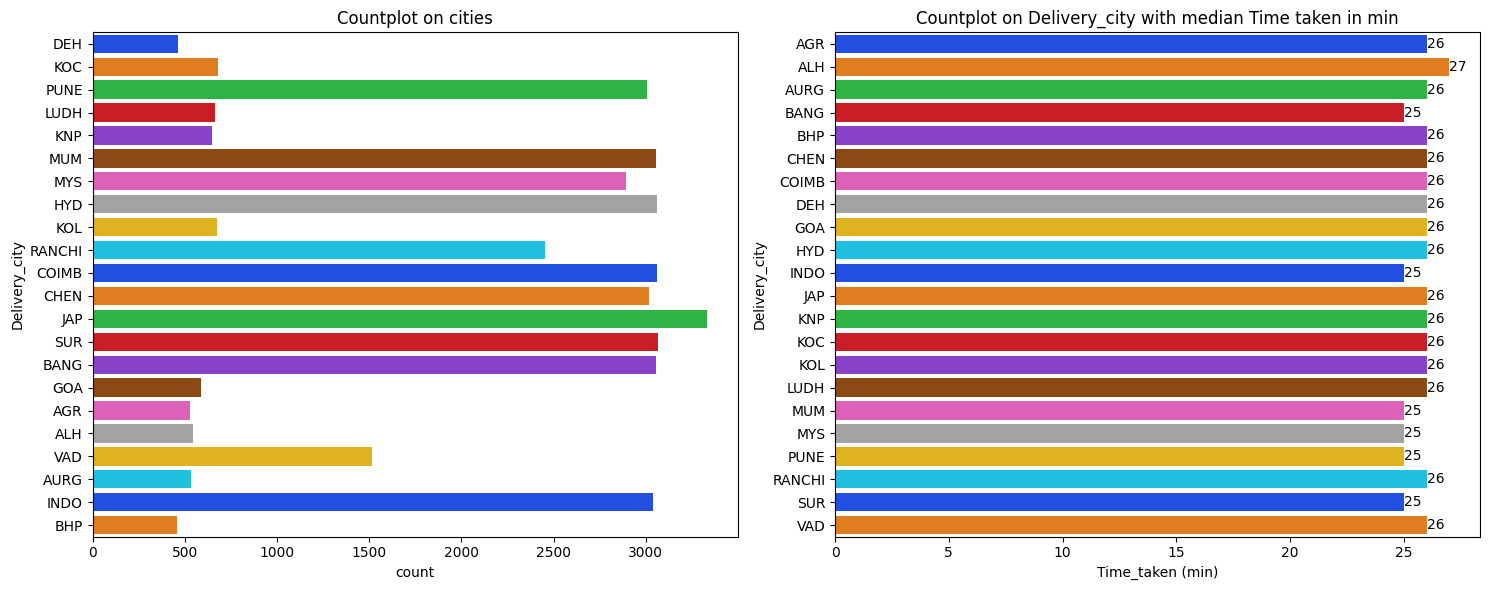

In [514]:


# Set the figure size
plt.figure(figsize=(15, 6))

# Subplot 1: Countplot of cities
plt.subplot(1, 2, 1)
sns.countplot(data['Delivery_city'], palette='bright')
plt.title("Countplot on cities")

# Subplot 2: Bar plot with median time taken per city
plt.subplot(1, 2, 2)
data1 = data.groupby(['Delivery_city']).median().reset_index()
ax = sns.barplot(x='Time_taken (min)', y='Delivery_city', data=data1, palette='bright')
plt.title('Countplot on Delivery_city with median Time taken in min')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


# Feature Enginnering

In [515]:
# checking all the numerical columns
numerical_feature=[feature for feature in data.columns if data[feature].dtypes != 'O']
numerical_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [516]:
data.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             200
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_min                     0
Time_Order_picked_Hour            0
Time_Order_picked_min             0
Delivery_city                     0
distance                          0
dtype: int64

In [517]:
data['multiple_deliveries'].dtypes

dtype('float64')

In [518]:
#dropping delivery_person_id
data.drop('Delivery_person_ID',axis=1,inplace=True)

In [519]:
data.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)


# dropping time ordered and time order_picked

In [520]:
data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [521]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,46,2022,12,2,21,55,22,10,DEH,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,23,2022,2,13,14,55,15,5,KOC,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,21,2022,4,3,17,30,17,40,PUNE,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,41,2022,2,14,19,50,20,5,KNP,19.396618


In [522]:
data.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int64
month                            int64
day                              int64
TimeOrder_Hour                   int32
TimeOrder_min                    int32
Time_Order_picked_Hour           int32
Time_Order_picked_min            int32
Delivery_city                   object
distance                       float64
dtype: object

In [523]:
# listing the categorical and numerical columns
num_col=[feature for feature in data.columns if data[feature].dtypes != 'O']
cat_col=[feature for feature in data.columns if data[feature].dtypes == 'O']

In [524]:
num_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [525]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

In [526]:
data.sample()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
10284,36.0,4.8,17.440827,78.393391,17.500827,78.453391,Windy,Medium,0,Buffet,...,27,2022,1,4,17,50,18,5,HYD,9.220148


In [527]:
data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_min'],axis=1,inplace=True)

In [528]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,KNP,19.396618


# Spliting the feature and target

In [529]:
X = data.drop(labels=['Time_taken (min)'],axis=1)
y = data[['Time_taken (min)']]

In [530]:
data[cat_col].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [531]:
num_col=[feature for feature in data.columns if data[feature].dtypes != 'O']

In [532]:
data[num_col].head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),TimeOrder_Hour,distance
0,36.0,4.2,2,3.0,46,21,10.280582
1,21.0,4.7,1,1.0,23,14,6.242319
2,23.0,4.7,1,1.0,21,17,13.787860
3,34.0,4.3,0,0.0,20,9,2.930258
4,24.0,4.7,1,1.0,41,19,19.396618


In [533]:
data[data['Road_traffic_density']=='Low']

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
11,31.0,4.7,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26,22,RANCHI,19.618739
12,37.0,5.0,Sandstorms,Low,1,Snack,motorcycle,1.0,No,Metropolitian,20,8,COIMB,1.558132
17,35.0,4.3,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38,23,SUR,13.682045
19,23.0,4.8,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12,23,PUNE,16.853619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,30.0,4.9,Windy,Low,1,Snack,motorcycle,1.0,No,Metropolitian,26,10,COIMB,3.116127
45571,34.0,4.9,Sandstorms,Low,1,Snack,scooter,1.0,No,NaN,26,9,MYS,3.109134
45573,30.0,4.6,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20,0,PUNE,3.064267
45575,37.0,4.8,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20,9,CHEN,3.104827


In [534]:
Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']


In [535]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','multiple_deliveries',
                  'TimeOrder_Hour','distance']

In [536]:
!pip install category_encoders
from  category_encoders import OneHotEncoder



In [537]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from category_encoders import OneHotEncoder

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])


# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))
])

In [538]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [539]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [541]:
X_train=preprocessor.fit_transform(X_train)

In [542]:
X_test=preprocessor.transform(X_test)

# Training with the multiple algorithms and findout the best model

In [543]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [544]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))

    return r2, MAE , MSE,rmse

In [545]:
# training the multiple models to find out the best model out of it
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor()}

r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)

    print('-'*35)

    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('='*35)
    print('='*35)
    print('\n')

Random Forest
Model performance for Test set
- r2_score: 0.8286
- MAE: 3.1317
- MSE: 15.2981
- rmse: 3.9113
-----------------------------------
Model performance for train set
- r2_score: 0.9760
- MAE: 1.1459
- MSE: 2.0972
- rmse: 1.4482


Decision Tree
Model performance for Test set
- r2_score: 0.6882
- MAE: 4.0311
- MSE: 27.8266
- rmse: 5.2751
-----------------------------------
Model performance for train set
- r2_score: 1.0000
- MAE: 0.0000
- MSE: 0.0000
- rmse: 0.0000


Gradient Boosting
Model performance for Test set
- r2_score: 0.7697
- MAE: 3.6335
- MSE: 20.5584
- rmse: 4.5341
-----------------------------------
Model performance for train set
- r2_score: 0.7740
- MAE: 3.5680
- MSE: 19.7730
- rmse: 4.4467


linear Regression
Model performance for Test set
- r2_score: 0.5352
- MAE: 5.1311
- MSE: 41.4848
- rmse: 6.4409
-----------------------------------
Model performance for train set
- r2_score: 0.5396
- MAE: 5.0359
- MSE: 40.2738
- rmse: 6.3462


Ridge
Model performance for Te

In [546]:
Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
5,XGBRegressor,0.828837
0,Random Forest,0.828605
2,Gradient Boosting,0.769671
1,Decision Tree,0.688240
4,Ridge,0.535238
3,linear Regression,0.535218


In [547]:
Results = pd.DataFrame(list(zip(models_list, mse_list)), columns=['Model Name', 'Mse'])
Results.sort_values(by=["Mse"],ascending=True)

,Model Name,Mse
5,XGBRegressor,15.277401
0,Random Forest,15.298126
2,Gradient Boosting,20.558401
1,Decision Tree,27.826620
4,Ridge,41.482991
3,linear Regression,41.484824


# Random forest with 82% accuracy

In [548]:
model = XGBRegressor()
model.fit(X_train, y_train) # Train model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [549]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Test set performance
r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)

print(list(models.keys())[i])
models_list.append(list(models.keys())[i])

print('Model performance for Test set')
print('- r2_score: {:.4f}'.format(r2))
print('- MAE: {:.4f}'.format(MAE))
print('- MSE: {:.4f}'.format(MSE))
print('- rmse: {:.4f}'.format(rmse))
r2_list.append(r2)
mse_list.append(MSE)
print('-'*35)

print('Model performance for train set')
print('- r2_score: {:.4f}'.format(r2_train))
print('- MAE: {:.4f}'.format(MAE_train))
print('- MSE: {:.4f}'.format(MSE_train))
print('- rmse: {:.4f}'.format(rmse_train))

print('='*35)
print('='*35)
print('\n')

XGBRegressor
Model performance for Test set
- r2_score: 0.8288
- MAE: 3.1345
- MSE: 15.2774
- rmse: 3.9086
-----------------------------------
Model performance for train set
- r2_score: 0.8752
- MAE: 2.6442
- MSE: 10.9201
- rmse: 3.3046




In [550]:
import pickle
# Assuming your model is named 'model'
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


# Making the Single Predection

In [552]:
data.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,KNP,19.396618
5,29.0,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,MUM,13.763977
6,35.0,4.0,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,33,14,MYS,6.218001
7,33.0,4.2,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,40,20,PUNE,16.849940
8,34.0,4.9,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41,20,HYD,10.757109
9,21.0,4.7,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,15,21,KOL,4.540574


Making the Single Predection

In [576]:
attributes  = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'TimeOrder_Hour', 'Delivery_city', 'distance']

features_list_numerical = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
                 'multiple_deliveries', 'TimeOrder_Hour', 'distance']

user_inputs = {}

for feature in attributes:
    temp = input(f'Enter the {feature} ->')
    if feature in features_list_numerical:
       user_inputs[feature] = float(temp)
    else:
       user_inputs[feature] = temp


Enter the Delivery_person_Age ->25
Enter the Delivery_person_Ratings ->4.35
Enter the Weather_conditions ->Fog
Enter the Road_traffic_density ->Jam
Enter the Vehicle_condition ->2
Enter the Type_of_order ->Meal
Enter the Type_of_vehicle ->motorcycle
Enter the multiple_deliveries ->1
Enter the Festival ->No
Enter the City ->Metropolitian
Enter the TimeOrder_Hour ->17
Enter the Delivery_city ->PUNE
Enter the distance ->12


In [578]:
features = pd.DataFrame([user_inputs])

In [584]:
features

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,TimeOrder_Hour,Delivery_city,distance
0,25.0,4.35,Fog,Jam,2.0,Meal,motorcycle,1.0,No,Metropolitian,17.0,PUNE,12.0


In [580]:
features_transformed=preprocessor.transform(features)
features_transformed

array([[ 4.09358607, 13.84200634,  2.45387175,  1.73684084,  2.54772546,
         2.14756815,  0.        ,  2.3051081 ,  0.        ,  0.        ,
         0.        ,  2.03076885,  0.        ,  7.22842079,  0.        ,
         2.39378762,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  3.80794879,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.40709361,  1.76290324]])

In [583]:
print(model.predict(features_transformed)[0])

37.22495
